In [6]:
import tensorflow 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt


In [7]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 7s 1us/step


In [13]:
X_train.shape

(60000, 28, 28)

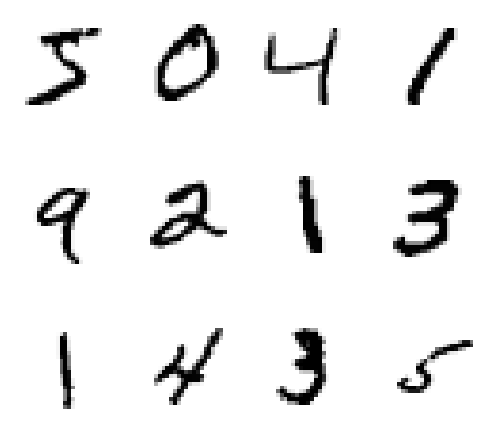

In [14]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3,4,k+1)
    plt.imshow(X_train[k], cmap="Greys")
    plt.axis("off")
    
plt.tight_layout()
plt.show();

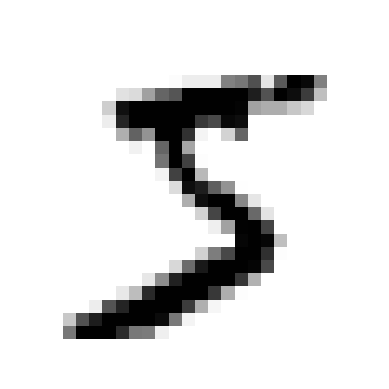

In [16]:
## plotting only single digit
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap = "binary")
    plt.axis("off")
some_digit = X_train[0]
plot_digit(some_digit)
plt.show()

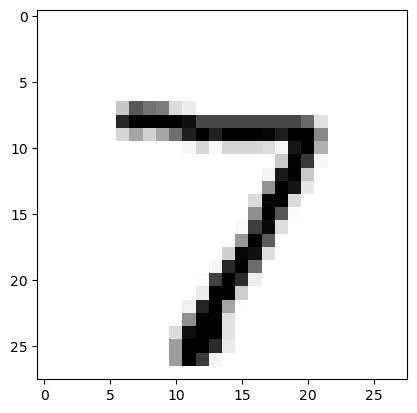

In [17]:
## plotting first digit of validation sets 

plt.imshow(X_valid[0], cmap="Greys")

In [18]:
y_valid[0]

7

In [21]:
## prepeocessing of data

X_train = X_train.reshape(60000, 784).astype("float32")
X_valid = X_valid.reshape(10000, 784).astype("float32")

In [22]:
## to normalise the data we reshape the data 

X_train /= 255
X_valid /=255

In [24]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [25]:
n_classes = 10 
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [27]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### design NN arch

In [28]:
model = Sequential()
## hidden layer
model.add(Dense(64, activation="sigmoid", input_shape = (784,)))

## output layer

model.add(Dense(10, activation='softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# compile model

In [33]:
model.compile(loss= 'mean_squared_error', optimizer = SGD(learning_rate = 0.01), metrics=['accuracy'])

# train

In [34]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200



469/469 [==============================] - 3s 4ms/step - loss: 0.0916 - accuracy: 0.1144 - val_loss: 0.0909 - val_accuracy: 0.1332
Epoch 2/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0907 - accuracy: 0.1362 - val_loss: 0.0902 - val_accuracy: 0.1559
Epoch 3/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0901 - accuracy: 0.1662 - val_loss: 0.0897 - val_accuracy: 0.1940
Epoch 4/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0896 - accuracy: 0.2097 - val_loss: 0.0892 - val_accuracy: 0.2383
Epoch 5/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0892 - accuracy: 0.2533 - val_loss: 0.0888 - val_accuracy: 0.2810
Epoch 6/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0887 - accuracy: 0.2832 - val_loss: 0.0884 - val_accuracy: 0.3068
Epoch 7/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0883 - accuracy: 0.3045 - val_loss: 0.0880 - val_accuracy: 0.3237
Epoch 8/200

In [35]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0272 - accuracy: 0.8688


[0.027239080518484116, 0.8687999844551086]

In [36]:
valid_0 = X_valid[0].reshape(1, 784)

In [37]:
model.predict(valid_0)

1/1 [==============================] - 0s 118ms/step


array([[0.00688593, 0.00112572, 0.00173401, 0.01063465, 0.00721964,
        0.0200084 , 0.00153135, 0.89983237, 0.00499124, 0.04603665]],
      dtype=float32)

In [39]:
model.predict(valid_0).argmax(axis=-1)

1/1 [==============================] - 0s 39ms/step


array([7], dtype=int64)